<a href="https://colab.research.google.com/github/mihirgupte/pytorch-exercises/blob/main/Simple%20Logistic%20Regression%20for%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np
import torch.nn.functional as F

In [ ]:
dataset = MNIST(root="/data",download=True)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 2


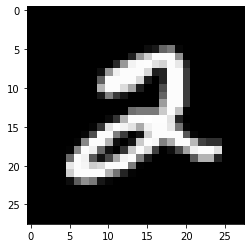

In [8]:
image, label = dataset[5]
plt.imshow(image,cmap='gray')
print("Label:",label)

In [10]:
dataset = MNIST(root="/data",train=True,transform=transforms.ToTensor())

In [25]:
image_tensor, label = dataset[5]
image_tensor[:,15:20,5:15]

tensor([[[0.0000, 0.0000, 0.0000, 0.0196, 0.2118, 0.8902, 0.9882, 0.9529,
          0.8941, 0.6667],
         [0.0000, 0.0000, 0.0235, 0.3059, 0.9882, 0.9882, 0.4902, 0.2314,
          0.0000, 0.0706],
         [0.0000, 0.0196, 0.5294, 0.9882, 0.9882, 0.7059, 0.0627, 0.0000,
          0.0824, 0.7961],
         [0.0118, 0.5333, 0.9882, 0.9451, 0.4157, 0.0667, 0.0000, 0.2078,
          0.7843, 0.9882],
         [0.4118, 0.9882, 0.9490, 0.3451, 0.0706, 0.2863, 0.6667, 0.9569,
          0.9882, 0.4941]]])

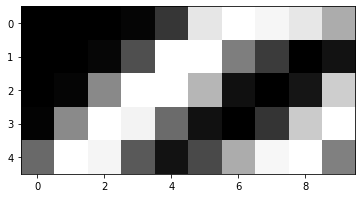

In [28]:
plt.imshow(image_tensor[0,15:20,5:15],cmap='gray')

In [33]:
from torch.utils.data import random_split,DataLoader
train_set, val_set = random_split(dataset,[50000,10000])
batch_size = 128
train_dl = DataLoader(train_set,batch_size,shuffle=True)
val_dl = DataLoader(val_set,batch_size)

In [112]:
import torch.nn as nn
size = 28*28
out = 10
model = nn.Linear(size,out)
print(model.weight,model.bias)

Parameter containing:
tensor([[ 0.0179, -0.0246,  0.0076,  ..., -0.0214,  0.0012, -0.0192],
        [-0.0296,  0.0347, -0.0270,  ..., -0.0279,  0.0261, -0.0337],
        [-0.0250, -0.0039, -0.0185,  ...,  0.0319, -0.0122, -0.0282],
        ...,
        [-0.0339, -0.0127, -0.0264,  ..., -0.0098,  0.0290,  0.0069],
        [ 0.0213, -0.0162, -0.0219,  ...,  0.0036,  0.0312,  0.0348],
        [-0.0262,  0.0128, -0.0244,  ...,  0.0103,  0.0205,  0.0144]],
       requires_grad=True) Parameter containing:
tensor([-0.0026,  0.0137,  0.0290,  0.0140, -0.0067, -0.0260, -0.0141,  0.0278,
         0.0322,  0.0262], requires_grad=True)


In [115]:
class CustModel(nn.Module):
  size = 28*28
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(self.size,out)
  def forward(self,data):
    data = data.reshape(-1,28*28)
    out = self.linear(data)
    return out

model = CustModel()

In [53]:
for images,labels in train_dl:
  print(images.shape)
  out = model(images)
  print(out.shape)
  break
list(model.parameters())

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


[Parameter containing:
 tensor([[ 0.0347,  0.0037, -0.0246,  ...,  0.0287,  0.0266, -0.0177],
         [-0.0259, -0.0079, -0.0275,  ..., -0.0261, -0.0292, -0.0018],
         [-0.0324, -0.0227, -0.0017,  ..., -0.0327,  0.0343,  0.0326],
         ...,
         [-0.0045, -0.0126, -0.0290,  ...,  0.0338,  0.0270,  0.0064],
         [-0.0335, -0.0046, -0.0287,  ...,  0.0053, -0.0112, -0.0246],
         [ 0.0013, -0.0124,  0.0265,  ..., -0.0033,  0.0008, -0.0042]],
        requires_grad=True), Parameter containing:
 tensor([-0.0262, -0.0247,  0.0321, -0.0167,  0.0347, -0.0221, -0.0131,  0.0215,
          0.0182, -0.0251], requires_grad=True)]

In [58]:
probs = F.softmax(out,dim=1)
print(out[0])
print(probs[0])
print(torch.sum(probs[0]))

tensor([-0.0849, -0.1472, -0.0128,  0.1258, -0.1286,  0.0744,  0.1196, -0.2891,
        -0.1253, -0.0486], grad_fn=<SelectBackward>)
tensor([0.0960, 0.0902, 0.1032, 0.1185, 0.0919, 0.1126, 0.1178, 0.0783, 0.0922,
        0.0995], grad_fn=<SelectBackward>)
tensor(1.0000, grad_fn=<SumBackward0>)


In [63]:
max_prob, pred  = torch.max(probs,dim=1)
print(pred)
print(labels)

tensor([3, 5, 5, 6, 5, 6, 6, 3, 0, 7, 1, 6, 6, 3, 0, 6, 4, 5, 2, 3, 6, 6, 0, 4,
        6, 5, 4, 3, 3, 4, 3, 3, 5, 3, 0, 3, 3, 3, 6, 4, 5, 7, 6, 3, 4, 4, 6, 1,
        6, 6, 4, 6, 1, 6, 2, 6, 6, 3, 6, 6, 6, 9, 0, 5, 3, 6, 3, 4, 5, 0, 4, 6,
        4, 3, 0, 6, 6, 7, 4, 2, 6, 4, 1, 0, 4, 5, 3, 4, 5, 3, 6, 6, 3, 6, 0, 3,
        7, 7, 6, 6, 6, 6, 6, 0, 0, 6, 1, 7, 5, 3, 7, 4, 4, 5, 2, 3, 6, 4, 5, 3,
        3, 3, 5, 6, 6, 6, 1, 3])
tensor([8, 8, 6, 3, 8, 7, 0, 3, 0, 9, 5, 5, 2, 3, 6, 4, 8, 5, 2, 4, 4, 7, 6, 6,
        9, 2, 2, 4, 8, 9, 4, 7, 9, 6, 6, 3, 9, 8, 4, 7, 8, 4, 1, 2, 6, 1, 0, 6,
        0, 8, 1, 0, 5, 2, 9, 4, 7, 5, 4, 4, 4, 9, 0, 9, 5, 5, 4, 1, 6, 0, 1, 3,
        1, 2, 0, 3, 3, 0, 4, 2, 5, 5, 0, 6, 1, 9, 4, 1, 6, 2, 0, 1, 8, 4, 9, 8,
        7, 9, 3, 0, 9, 4, 4, 2, 4, 0, 2, 9, 4, 4, 7, 1, 1, 3, 9, 9, 7, 5, 9, 5,
        5, 2, 0, 7, 8, 7, 7, 8])


In [83]:
def accuracy(l1,l2):
  _,pred = torch.max(l1,dim=1)
  return torch.sum(pred==l2).item()/len(l2)

In [71]:
loss_fn = F.cross_entropy
loss = loss_fn(out,labels)

In [73]:
learning_rate = 0.001
opt = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [103]:
def loss_batch(model,input_val,actual_val,loss_fn,opt,metric):
  pred = model(input_val)
  loss = loss_fn(pred,actual_val)
  with torch.no_grad():
    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item(),len(input_val),metric(pred,actual_val)

In [118]:
def evaluate(model,val_dl,loss_fn,opt,metric):
  #with torch.no_grad():
  results = [loss_batch(model,x,y,loss_fn,opt,metric) for x,y in val_dl]
  loss,num,metrics = zip(*results)
  total = np.sum(num)
  avg_loss = np.sum(np.multiply(loss,num))/total
  avg_metric = np.sum(np.multiply(metrics,num))/total
  return avg_loss,avg_metric,total

In [119]:
evaluate(model,val_dl,loss_fn,opt,accuracy)

(1.8920062843322754, 0.6677, 10000)

In [122]:
def fit(epochs,model,loss_fn,opt,train_dl,val_dl,metric):
  for epoch in range(epochs):

    for x,y in train_dl:
      loss,_,_ = loss_batch(model,x,y,loss_fn,opt,accuracy)
    result = evaluate(model,val_dl,loss_fn,opt,accuracy)
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1, result[0], result[1]))

In [120]:
model = CustModel()
opt = torch.optim.SGD(model.parameters(),lr=0.001)

In [123]:
fit(5,model,loss_fn,opt,train_dl,val_dl,accuracy)

Epoch [1], val_loss: 1.0220, val_acc: 0.8234
Epoch [2], val_loss: 0.9529, val_acc: 0.8290
Epoch [3], val_loss: 0.8972, val_acc: 0.8340
Epoch [4], val_loss: 0.8513, val_acc: 0.8380
Epoch [5], val_loss: 0.8128, val_acc: 0.8429


In [142]:
test_data = MNIST(root='/data',train=False,transform=transforms.ToTensor())

In [137]:
def predict_image(model,image):
  image = image.unsqueeze(0)
  pred = model(image)
  _,preds = torch.max(pred,dim=1)
  return preds

Actual: 1 , Predicted: 1


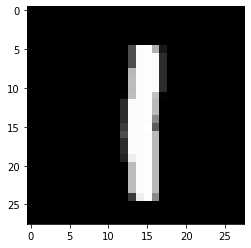

In [159]:
import random,math

img,val = test_data[math.floor(random.random()*len(train_data))]
print("Actual: {} , Predicted: {}".format(val,predict_image(model,img[0]).item()))
plt.imshow(img[0],cmap='gray')